In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
final_df = pd.read_csv(r"C:\Users\Alvaro Millan Ruiz\OneDrive\Escritorio\BDS\Block_5\NLP\Project\Final_df.csv") 
final_df = final_df.drop(columns=["cleaned_speeches_no_postagging_expanded", "cleaned_speeches_no_postagging_no_expanded", 
                                  "cleaned_speeches_postagging_no_expanded", "cleaned_speeches_postagging_expanded"])
final_df

,Session,Year,ISO-Code,Speech,number_sentences,number_tokens,Income Level
0,45,1990,AFG,"﻿Allow me, first of all, Sir, to congratulate ...",159,4982,1
1,45,1990,AGO,"﻿First I would like to congratulate you, Sir, ...",77,2970,2
2,45,1990,ALB,﻿It is a special pleasure for me to speak at t...,112,3783,2
3,45,1990,ARE,"﻿\nMr. President, on behalf of the delegation ...",115,3407,4
4,45,1990,ARG,"﻿At the outset, let me convey to you, Sir, my ...",81,2816,2
...,...,...,...,...,...,...,...
6434,79,2024,WSM,"Excellencies, \nI extend my congratulations t...",68,1572,2
6435,79,2024,YEM,"Your Majesties, Excellencies, and Highnesses, ...",57,1876,1
6436,79,2024,ZAF,President of the 79th Session of the UN Genera...,100,1870,3
6437,79,2024,ZMB,"\n YOUR EXCELLENCY PHILEMON YANG, PRESIDENT O...",81,2348,2


# 1. Compare number of memember and number of speeches

In [8]:
un_membership  = {1990:159, 1991:166, 1992:179, 1993:184, 1994:184, 1995:184, 1996:184, 1997:184, 1998:184, 1999:188, 2000:189,
            2001:189, 2002:191, 2003:191, 2004:191, 2005:191, 2006:192, 2007:192, 2008:192, 2009:192, 2010:192, 2011:193, 
            2012:193, 2013:193, 2014:193, 2015:193, 2016:193, 2017:193, 2018:193, 2019:193, 2020:193, 2021:193, 2022:193, 2023:193, 2024:193}

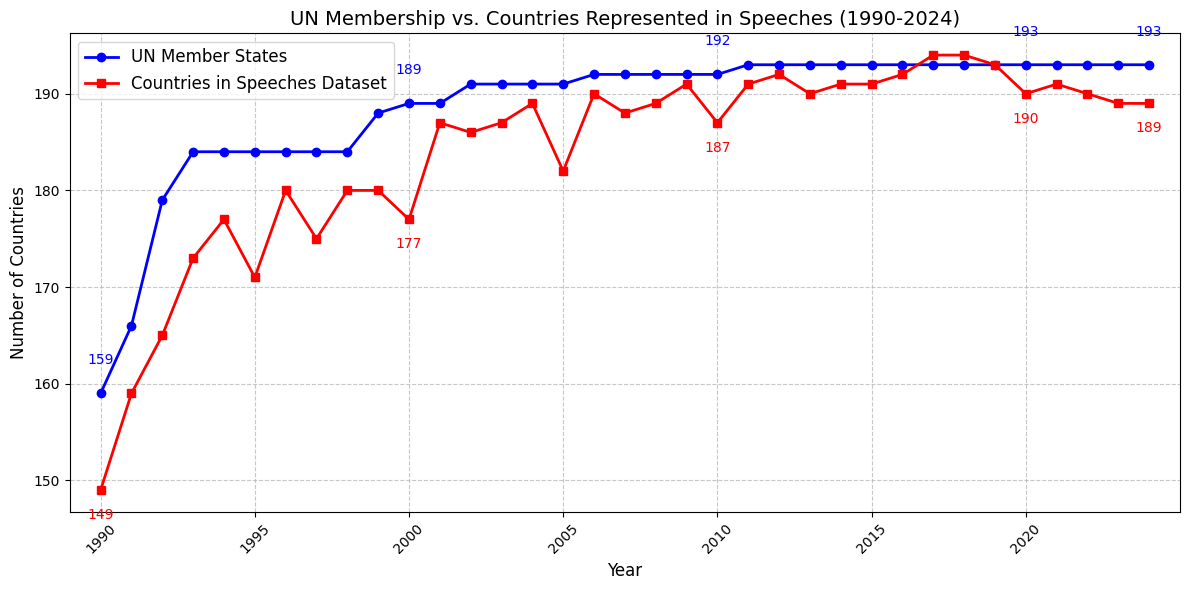

In [9]:
# df_summary = final_df.groupby('Year').agg(
#     number_of_nations=('ISO-Code', 'nunique')
# ).reset_index

# Convert to DataFrame
un_df = pd.DataFrame.from_dict(un_membership, orient='index', columns=['UN_Members']).reset_index()
un_df.columns = ['Year', 'UN_Members']

# Process your final_df data (assuming it's already loaded)
df_summary = final_df.groupby('Year')['ISO-Code'].nunique().reset_index()
df_summary.columns = ['Year', 'Countries_In_Speeches']

# Merge the two datasets
merged_df = pd.merge(un_df, df_summary, on='Year', how='left')

# Create the plot
plt.figure(figsize=(12, 6))

# Plot both lines
plt.plot(merged_df['Year'], merged_df['UN_Members'], 
         label='UN Member States', marker='o', color='blue', linewidth=2)
plt.plot(merged_df['Year'], merged_df['Countries_In_Speeches'], 
         label='Countries in Speeches Dataset', marker='s', color='red', linewidth=2)

# Add labels and title
plt.title('UN Membership vs. Countries Represented in Speeches (1990-2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Format x-axis
plt.xticks(range(1990, 2025, 5), rotation=45)
plt.xlim(1989, 2025)

# Add data labels for key years
for year in [1990, 2000, 2010, 2020, 2024]:
    un_val = merged_df[merged_df['Year'] == year]['UN_Members'].values[0]
    speech_val = merged_df[merged_df['Year'] == year]['Countries_In_Speeches'].values[0]
    plt.text(year, un_val+3, str(un_val), ha='center', color='blue')
    plt.text(year, speech_val-3, str(speech_val), ha='center', color='red')

plt.tight_layout()
plt.savefig('un_membership_vs_speeches.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Plot of the Token and stuff

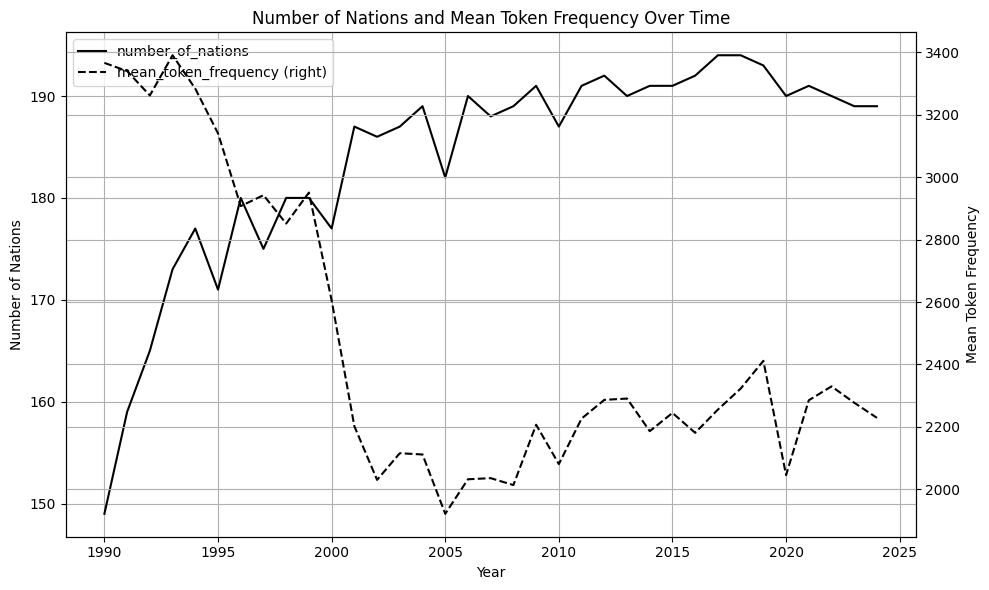

In [3]:
df_summary = final_df.groupby('Year').agg(
    number_of_nations=('ISO-Code', 'nunique'),
    total_tokens=('number_tokens', 'sum')
)

# Calculate mean token frequency
df_summary['mean_token_frequency'] = df_summary['total_tokens'] / df_summary['number_of_nations']

# Create the plot
ax = df_summary.loc[1946:, ['number_of_nations', 'mean_token_frequency']].plot(
    secondary_y='mean_token_frequency',  # Secondary axis for mean_token_frequency
    figsize=(10, 6),
    color=['black', 'black'],  # Both lines in black
    style=['-', '--'],         # Solid line for nations, dashed for token frequency
    title='Number of Nations and Mean Token Frequency Over Time'
)

# Add grid to both axes
ax.grid(True)
ax.right_ax.grid(True)  # Secondary y-axis grid

# Label axes
ax.set_ylabel('Number of Nations')
ax.right_ax.set_ylabel('Mean Token Frequency')


# Adjust layout
plt.tight_layout()
plt.show()

# 3. Year 1990 statistics

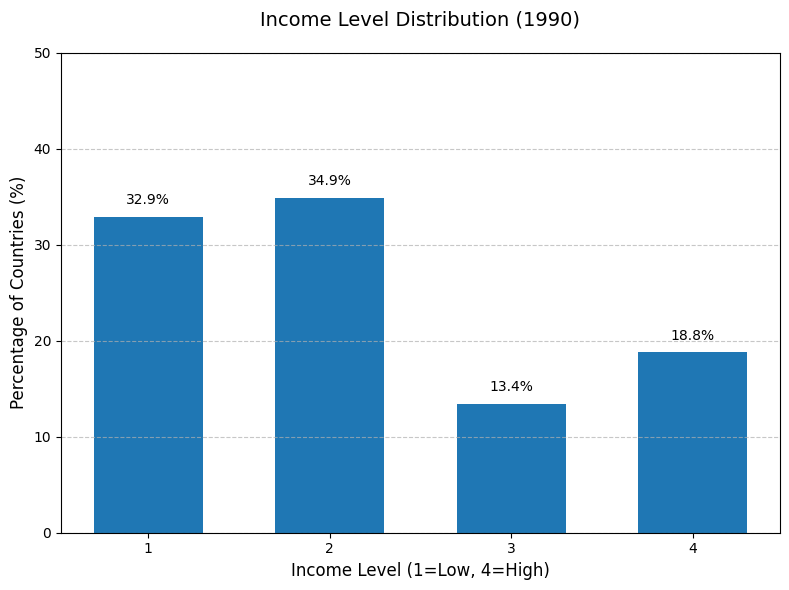

In [4]:
df_1990 = final_df[final_df['Year'] == 1990]

# Calculate percentages
percent_1990 = df_1990['Income Level'].value_counts(normalize=True).sort_index() * 100

# Create plot
plt.figure(figsize=(8, 6))
bars = plt.bar(percent_1990.index, percent_1990.values, color='#1f77b4', width=0.6)

# Add labels and title
plt.title('Income Level Distribution (1990)', fontsize=14, pad=20)
plt.xlabel('Income Level (1=Low, 4=High)', fontsize=12)
plt.ylabel('Percentage of Countries (%)', fontsize=12)
plt.xticks([1, 2, 3, 4])
plt.ylim(0, 50)

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height+1,
             f'{height:.1f}%',
             ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('income_distribution_1990.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Year 2024

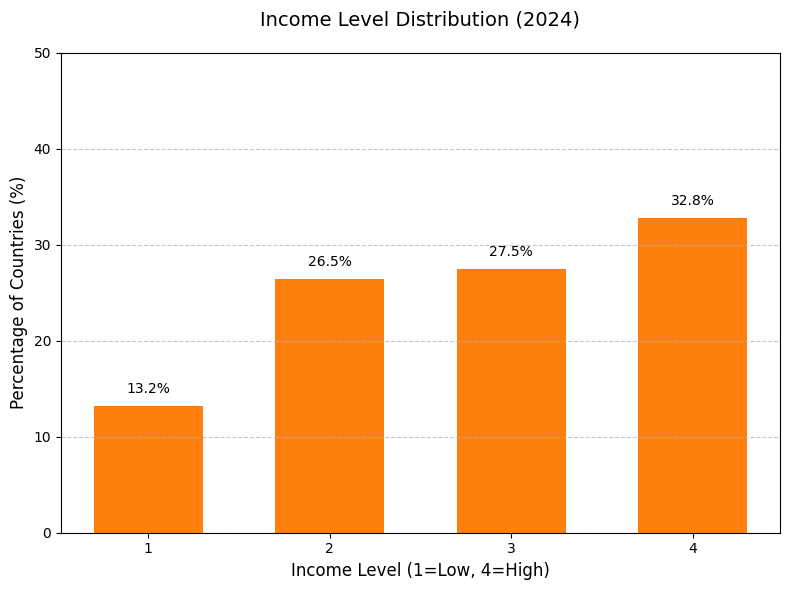

In [5]:
# Filter 2024 data
df_2024 = final_df[final_df['Year'] == 2024]

# Calculate percentages
percent_2024 = df_2024['Income Level'].value_counts(normalize=True).sort_index() * 100

# Create plot
plt.figure(figsize=(8, 6))
bars = plt.bar(percent_2024.index, percent_2024.values, color='#ff7f0e', width=0.6)

# Add labels and title
plt.title('Income Level Distribution (2024)', fontsize=14, pad=20)
plt.xlabel('Income Level (1=Low, 4=High)', fontsize=12)
plt.ylabel('Percentage of Countries (%)', fontsize=12)
plt.xticks([1, 2, 3, 4])
plt.ylim(0, 50)

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height+1,
             f'{height:.1f}%',
             ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('income_distribution_2024.png', dpi=300, bbox_inches='tight')
plt.show()